# **Import librares**

In [10]:

import numpy as np
import pandas as pd
import nltk
# import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### **Load Dataset**

In [4]:
import pandas as pd
data=pd.read_csv("/Synthetic_data/17k_synthetic_data (1).csv", index_col=0,engine='python', encoding='UTF-8').sample(10000)
data.head()

,sentence,subject
12305,Social development is a crucial aspect of huma...,Psychology
851,Urban informatics involves the use of data ana...,Geography
1968,The General Agreement on Tariffs and Trade is ...,Law
6842,"The rocky planets, including Earth, formed clo...",Astronomy
1844,The Korean Empire was a brief but significant ...,History


# **Data Cleaning**

In [5]:
data['sentence']=data['sentence'].fillna("")
data.isna().sum()


,0
sentence,0
subject,0


In [5]:
pip install datasets

In [6]:
pip install datasets --upgarde


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgarde


In [ ]:
!pip install --upgrade pyarrow
!pip install --upgrade datasets
!pip install pyarrow==12.0.1



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 12.0.1 which is incompatible.
datasets 2.21.0 requires pyarrow>=15.0.0, but you have pyarrow 12.0.1 which is incompatible.


In [8]:
from datasets import Dataset
dataset=Dataset.from_pandas(data.sample(10000))  # 10000 sample data 
dataset

Dataset({
    features: ['sentence', 'subject', '__index_level_0__'],
    num_rows: 10000
})

In [8]:
df=data.copy()
df.rename(columns={"sentence":"text","subject":"category"},inplace=True)
df.head()

,text,category
12305,Social development is a crucial aspect of huma...,Psychology
851,Urban informatics involves the use of data ana...,Geography
1968,The General Agreement on Tariffs and Trade is ...,Law
6842,"The rocky planets, including Earth, formed clo...",Astronomy
1844,The Korean Empire was a brief but significant ...,History


# **Preprocessing**

In [11]:
df['lower_case'] = df['text'].apply(lambda x: str(x).lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ')

df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [12]:
df

,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
12305,Social development is a crucial aspect of huma...,Psychology,social development is a crucial aspect of huma...,social development is a crucial aspect of huma...,social development is a crucial aspect of huma...,"[social, development, is, a, crucial, aspect, ...","['social', 'development', 'crucial', 'aspect',...","[social, development, crucial, aspect, human, ...",social development crucial aspect human psycho...,social development crucial aspect human psycho...
851,Urban informatics involves the use of data ana...,Geography,urban informatics involves the use of data ana...,urban informatics involves the use of data ana...,urban informatics involves the use of data ana...,"[urban, informatics, involves, the, use, of, d...","['urban', 'informatics', 'involves', 'use', 'd...","[urban, informatics, involves, use, data, anal...",urban informatics involves use data analytics ...,urban informatics involves use data analytics ...
1968,The General Agreement on Tariffs and Trade is ...,Law,the general agreement on tariffs and trade is ...,the general agreement on tariffs and trade is ...,the general agreement on tariffs and trade is ...,"[the, general, agreement, on, tariffs, and, tr...","['general', 'agreement', 'tariffs', 'trade', '...","[general, agreement, tariffs, trade, cornersto...",general agreement tariffs trade cornerstone in...,general agreement tariff trade cornerstone int...
6842,"The rocky planets, including Earth, formed clo...",Astronomy,"the rocky planets, including earth, formed clo...",the rocky planets including earth formed clo...,the rocky planets including earth formed clo...,"[the, rocky, planets, including, earth, formed...","['rocky', 'planets', 'including', 'earth', 'fo...","[rocky, planets, including, earth, formed, clo...",rocky planets including earth formed close sun...,rocky planet including earth formed close sun ...
1844,The Korean Empire was a brief but significant ...,History,the korean empire was a brief but significant ...,the korean empire was a brief but significant ...,the korean empire was a brief but significant ...,"[the, korean, empire, was, a, brief, but, sign...","['korean', 'empire', 'brief', 'significant', '...","[korean, empire, brief, significant, period, k...",korean empire brief significant period korean ...,korean empire brief significant period korean ...
...,...,...,...,...,...,...,...,...,...,...
6107,A supernova is a massive star explosion that b...,Astronomy,a supernova is a massive star explosion that b...,a supernova is a massive star explosion that b...,a supernova is a massive star explosion that b...,"[a, supernova, is, a, massive, star, explosion...","['supernova', 'massive', 'star', 'explosion', ...","[supernova, massive, star, explosion, briefly,...",supernova massive star explosion briefly outsh...,supernova massive star explosion briefly outsh...
4726,Plato's theory of knowledge is based on the id...,Philosophy,plato's theory of knowledge is based on the id...,plato's theory of knowledge is based on the id...,plato's theory of knowledge is based on the id...,"[plato, s, theory, of, knowledge, is, based, o...","['plato', 'theory', 'knowledge', 'based', 'ide...","[plato, theory, knowledge, based, idea, knowle...",plato theory knowledge based idea knowledge re...,plato theory knowledge based idea knowledge re...
14942,Activity-Based Management provides a framework...,Accounting,activity-based management provides a framework...,activity based management provides a framework...,activity based management provides a framework...,"[activity, based, management, provides, a, fra...","['activity', 'based', 'management', 'provides'...","[activity, based, management, provides, framew...",activity based management provides framework m...,activity based management provides framework m...
8034,The general formula for a carboxylic acid is R...,Chemistry,the general formula for a carb

## Visualization

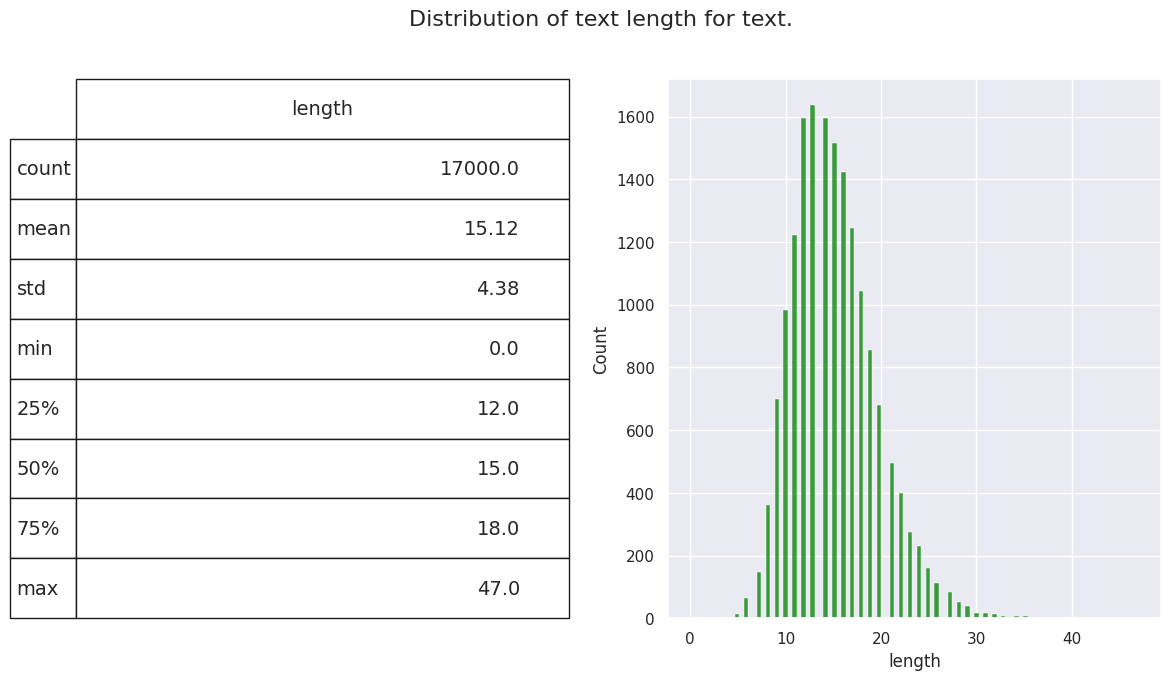

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

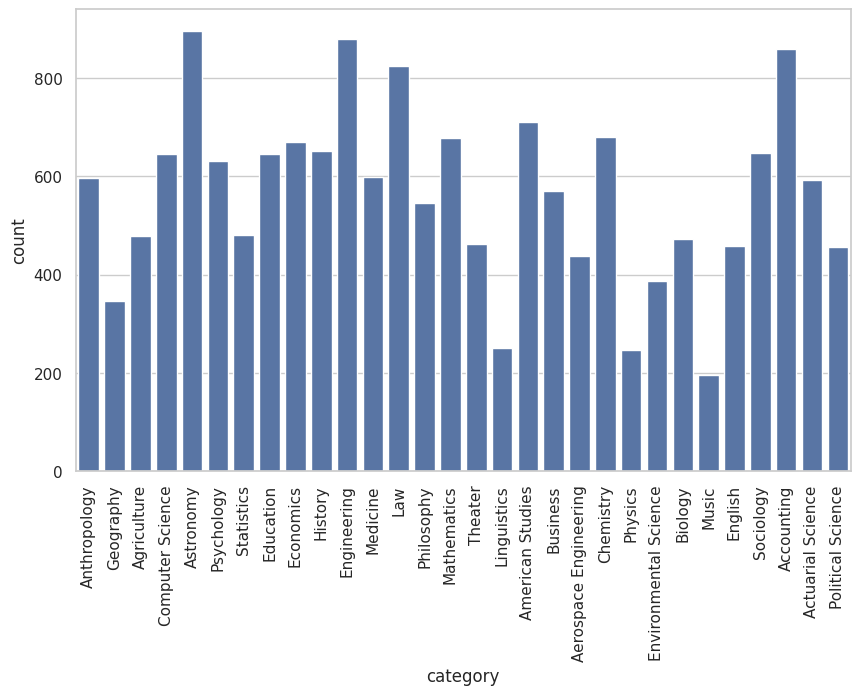

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
df['category'].value_counts()

,count
category,
Astronomy,895
Engineering,880
Accounting,860
Law,825
American Studies,711
Chemistry,680
Mathematics,679
Economics,670
History,651


In [19]:
education_text = df[df['category']=='Education']
business_text = df[df['category']=='Business']
politics_text = df[df['category']=='Political Science']
tech_text = df[df['category']=='Computer Science']
entertainment_text = df[df['category']=='Music']

In [20]:
entertainment_text=pd.concat([entertainment_text , df[df['category']=='Theater']])
entertainment_text


,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
4342,Formal music education often involves the stud...,Music,formal music education often involves the stud...,formal music education often involves the stud...,formal music education often involves the stud...,"[formal, music, education, often, involves, th...","['formal', 'music', 'education', 'often', 'inv...","[formal, music, education, often, involves, st...",formal music education often involves study mu...,formal music education often involves study mu...
4351,Music in type-3 language is characterized by c...,Music,music in type-3 language is characterized by c...,music in type language is characterized by c...,music in type language is characterized by c...,"[music, in, type, 3, language, is, characteriz...","['music', 'type', '3', 'language', 'characteri...","[music, type, language, characterized, complex...",music type language characterized complex rhythms,music type language characterized complex rhythm
4373,The context-sensitive grammar of music is fasc...,Music,the context-sensitive grammar of music is fasc...,the context sensitive grammar of music is fasc...,the context sensitive grammar of music is fasc...,"[the, context, sensitive, grammar, of, music, ...","['context', 'sensitive', 'grammar', 'music', '...","[context, sensitive, grammar, music, fascinating]",context sensitive grammar music fascinating,context sensitive grammar music fascinating
4280,Music and Recursively Enumerable Language can ...,Music,music and recursively enumerable language can ...,music and recursively enumerable language can ...,music and recursively enumerable language can ...,"[music, and, recursively, enumerable, language...","['music', 'recursively', 'enumerable', 'langua...","[music, recursively, enumerable, language, can...",music recursively enumerable language can comb...,music recursively enumerable language can comb...
4407,The beauty of music lies in its context sensit...,Music,the beauty of music lies in its context sensit...,the beauty of music lies in its context sensit...,the beauty of music lies in its context sensit...,"[the, beauty, of, music, lies, in, its, contex...","['beauty', 'music', 'lies', 'context', 'sensit...","[beauty, music, lies, context, sensitivity]",beauty music lies context sensitivity,beauty music lie context sensitivity
...,...,...,...,...,...,...,...,...,...,...
14172,"In theater, character development can be influ...",Theater,"in theater, character development can be influ...",in theater character development can be influ...,in theater character development can be influ...,"[in, theater, character, development, can, be,...","['theater', 'character', 'development', 'can',...","[theater, character, development, can, influen...",theater character development can influenced a...,theater character development can influenced a...
14075,Script editing involves checking for consisten...,Theater,script editing involves checking for consisten...,script editing involves checking for consisten...,script editing involves checking for consisten...,"[script, editing, involves, checking, for, con...","['script', 'editing', 'involves', 'checking', ...","[script, editing, involves, checking, consiste...",script editing involves checking consistency c...,script editing involves checking consistency c...
14257,Greek tragedy was heavily influenced by mythol...,Theater,greek tragedy was heavily influenced by mythol...,greek tragedy was heavily influenced by mythol...,greek tragedy was heavily influenced by mythol...,"[greek, tragedy, was, heavily, influenced, by,...","['greek', 'tragedy', 'heavily', 'influenced', ...","[greek, tragedy, heavily, influenced, mytholog...",greek tragedy heavily influenced mythology fea...,greek tragedy heavily influenced mythology fea...
14243,The chorus provided commentary and background ...,Theater,the chorus provided commentary and background ...,the chorus provided commentary and background 

In [ ]:
top = Counter([item for sublist in education_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in sport_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in business_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in business_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in politics_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in politics_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in tech_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.D
ataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

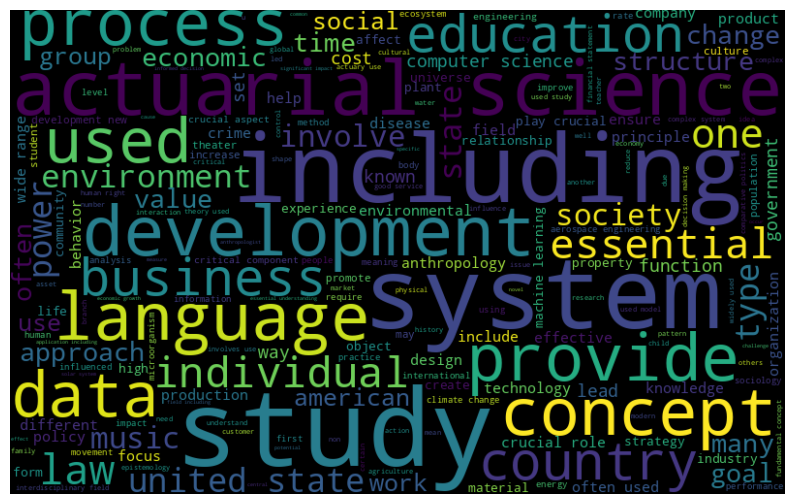

In [ ]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

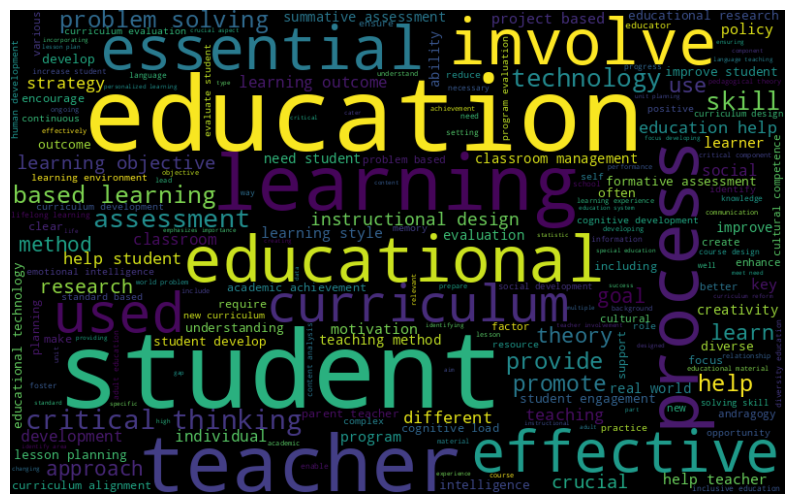

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Education']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

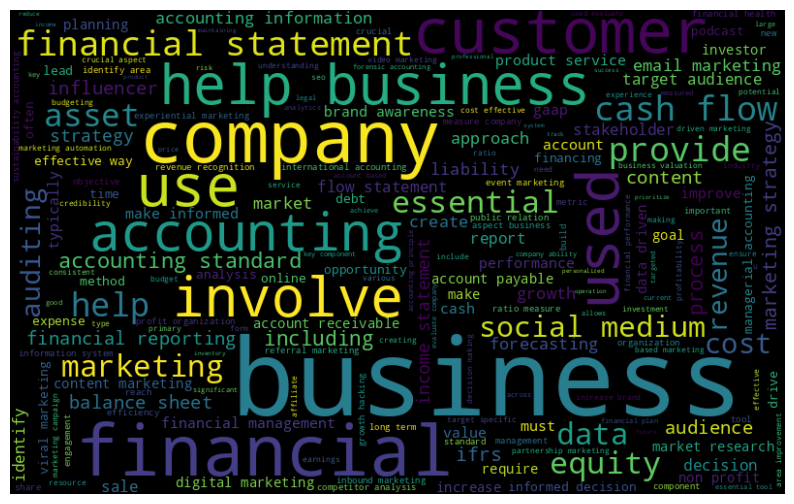

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

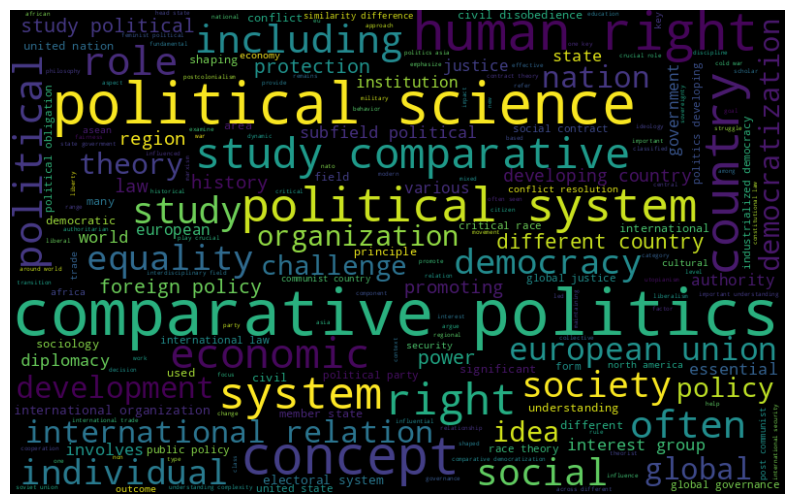

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Political Science']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

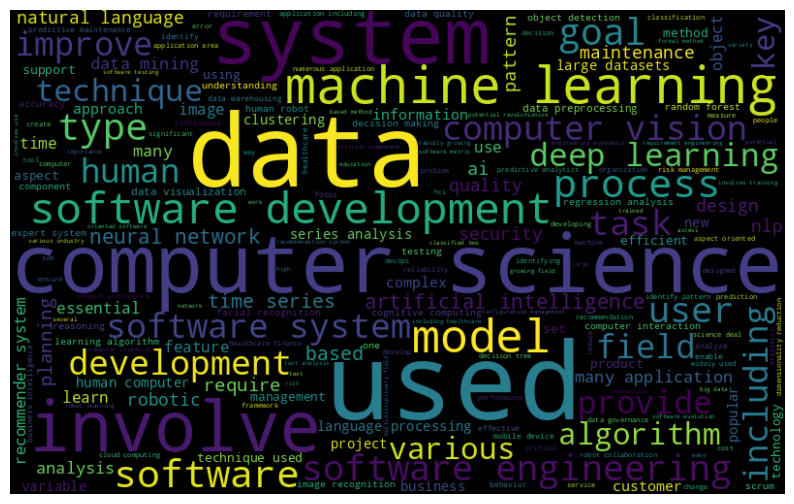

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Computer Science']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

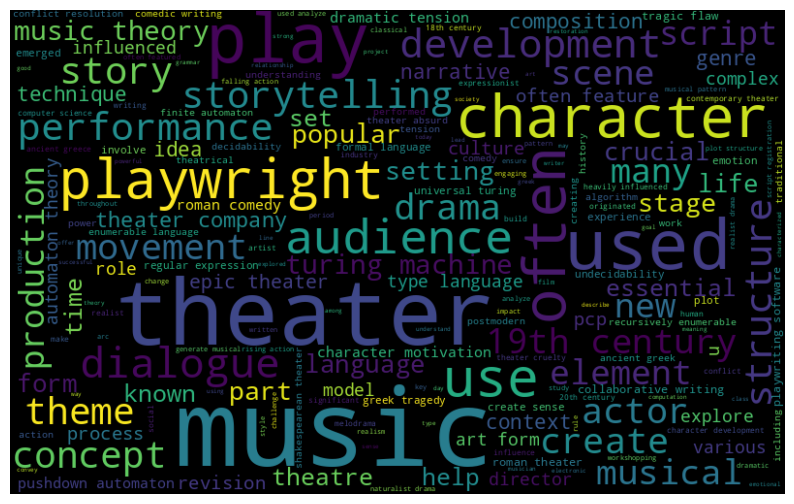

In [ ]:
normal_words =' '.join([text for text in entertainment_text["Text"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(7500, 48412) (2500, 48412) (7500,) (2500,)


In [ ]:
joblib.dump(count_vect, 'model/count_vect.pkl')


['count_vect.pkl']

# **Machine Learning Models**

# **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Accuracy: 0.8312941176470589
                       precision    recall  f1-score   support

           Accounting       0.78      0.90      0.83       206
    Actuarial Science       0.97      0.90      0.93       163
Aerospace Engineering       0.86      0.67      0.76       113
          Agriculture       0.84      0.83      0.84       115
     American Studies       0.73      0.71      0.72       179
         Anthropology       0.86      0.84      0.85       143
            Astronomy       0.80      0.95      0.87       191
              Biology       0.89      0.75      0.81       122
             Business       0.79      0.70      0.74       126
            Chemistry       0.88      0.91      0.89       175
     Computer Science       0.78      0.79      0.79       159
            Economics       0.88      0.92      0.90       162
            Education       0.93      0.93      0.93       166
          Engineering       0.86      0.86      0.86       227
              English    

In [ ]:
mc = count_vect.transform(["howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an attack mongrel shows labour is rattled by the opposition. in an upbeat speech to his party s spring conference in brighton he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate. something tells me that someone somewhere out there is just a little bit rattled mr howard said. mr hain leader of the commons told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an attack mongrel and playing opposition for opposition sake . mr howard told his party that labour would do anything say anything claim anything to cling on to office at all costs . so far this year they have compared me to fagin to shylock and to a flying pig. this morning peter hain even called me a mongrel. i don t know about you but something tells me that someone somewhere out there is just a little bit rattled. environment secretary margaret beckett rejected mr howard s comment telling radio 4 s pm programme that labour was not rattled . we have a very real duty to try to get people to focus on michael howard s record what the proposals are that he is trying to put forward to the country and also the many examples we are seeing now of what we believe is really poor judgement on his behalf. mr howard said tory policies on schools taxes immigration and crime were striking a chord with voters. since the beginning of this year - election year - we ve been making the political weather he told the party conference. mr howard denied he had been playing politics by raising the case of margaret dixon whose operation had been cancelled seven times which grabbed headlines for the party two weeks ago. and he hit back at labour claims he had used mrs dixon as a human shield . she s not a human shield mr blair she s a human being. mr howard said his party plans for immigration quotas which have also been the focus of much media coverage were not racist - just common sense . he pledged cleaner hospitals and better school discipline with a promise to get rid of political correctness in the national curriculum and give everyone to the same chance of a decent state education as he had. i come from an ordinary family. if the teenage michael howard were applying to cambridge today gordon brown would love me. and he stressed his party s commitment to cut taxes and red tape and increase the basic state pension in line with earnings. he finished with a personal appeal to party activists to go out and win the next election. one day you will be able to tell your children and grandchildren as i will tell mine i was there. i did my bit. i played my part. i helped to win that famous election - the election that transformed our country for the better . labour election co-ordinator alan milburn said: michael howard s speech today confirms what we have always said - that his only strategy is opportunism but he has no forward vision for the country. in reference to the appearance of mr howard s family on the conference stage with him mr milburn said: michael howard is perfectly entitled to pose with his family today. but it is the hard working families across britain that will be damaged by his plan to cut £35bn from public spending."])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['American Studies']


In [ ]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.8312941176470589
Cross-validated scores: [0.83686275 0.8454902  0.84078431 0.8454902  0.83529412 0.83686275
 0.83921569 0.84392157 0.83843137 0.84235294]


In [ ]:
joblib.dump(lr, 'model/Text_LR.pkl')


['Text_LR.pkl']

# **Support Vector Machine**

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Accuracy: 0.8588235294117647
                       precision    recall  f1-score   support

           Accounting       0.81      0.89      0.85       206
    Actuarial Science       0.96      0.91      0.94       163
Aerospace Engineering       0.84      0.77      0.81       113
          Agriculture       0.85      0.91      0.88       115
     American Studies       0.80      0.74      0.77       179
         Anthropology       0.91      0.86      0.88       143
            Astronomy       0.85      0.94      0.90       191
              Biology       0.92      0.82      0.87       122
             Business       0.75      0.71      0.73       126
            Chemistry       0.91      0.94      0.92       175
     Computer Science       0.83      0.82      0.83       159
            Economics       0.90      0.93      0.92       162
            Education       0.96      0.95      0.95       166
          Engineering       0.92      0.85      0.88       227
              English    

In [ ]:
mc = count_vect.transform(["To combat this trend, we need politicians who are willing to stand up for the interests of the working class. We need leaders who are committed to creating a more just and equitable society, where everyone has a chance to succeed regardless of their background."])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['Education']


In [ ]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `Tr

0.8588235294117647
Cross-validated scores: [0.86745098 0.88235294 0.88078431 0.87843137 0.87372549 0.87058824
 0.87058824 0.86509804 0.87294118 0.88078431]


In [ ]:
joblib.dump(svc, 'model/Text_SVM.pkl')


['Text_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.7663529411764706
                       precision    recall  f1-score   support

           Accounting       0.59      0.96      0.73       206
    Actuarial Science       0.85      0.94      0.89       163
Aerospace Engineering       0.90      0.38      0.53       113
          Agriculture       0.84      0.78      0.81       115
     American Studies       0.68      0.69      0.69       179
         Anthropology       0.70      0.86      0.77       143
            Astronomy       0.60      0.98      0.75       191
              Biology       0.94      0.59      0.72       122
             Business       0.88      0.45      0.60       126
            Chemistry       0.87      0.86      0.87       175
     Computer Science       0.71      0.77      0.74       159
            Economics       0.82      0.91      0.86       162
            Education       0.92      0.93      0.92       166
          Engineering       0.59      0.93      0.72       227
              English    

In [ ]:
mc = count_vect.transform(["One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['American Studies']


In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.7663529411764706
Cross-validated scores: [0.75843137 0.76470588 0.74823529 0.74039216 0.74352941 0.75137255
 0.74980392 0.72862745 0.73254902 0.76784314]


## **Randomforest**


In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.6964705882352941
                       precision    recall  f1-score   support

           Accounting       0.74      0.83      0.78       206
    Actuarial Science       0.86      0.94      0.90       163
Aerospace Engineering       0.66      0.73      0.70       113
          Agriculture       0.74      0.78      0.76       115
     American Studies       0.68      0.51      0.59       179
         Anthropology       0.72      0.81      0.77       143
            Astronomy       0.79      0.63      0.70       191
              Biology       0.79      0.63      0.70       122
             Business       0.70      0.70      0.70       126
            Chemistry       0.81      0.69      0.74       175
     Computer Science       0.78      0.50      0.61       159
            Economics       0.74      0.76      0.75       162
            Education       0.83      0.86      0.85       166
          Engineering       0.77      0.52      0.62       227
              English    

In [ ]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['American Studies']


In [ ]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.6964705882352941
Cross-validated scores: [0.71843137 0.7254902  0.70509804 0.70117647 0.70745098 0.69019608
 0.7027451  0.71686275 0.70196078 0.7145098 ]


# **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier with a valid max_features parameter
gbc = GradientBoostingClassifier(n_estimators=100, max_features='sqrt', max_depth=4, random_state=1, verbose=1)

# Fit the model
gbc.fit(x_train_tfidf, y_train)

# Make predictions
y_pred5_1 = gbc.predict(x_test_tfidf)

# Evaluate the model
print(accuracy_score(y_test, y_pred5_1))
print(classification_report(y_test, y_pred5_1))


      Iter       Train Loss   Remaining Time 
         1           3.2363           45.17s
         2           3.1182           44.80s
         3           3.0351           44.07s
         4           2.9482           43.34s
         5           2.8643           44.45s
         6           2.7783           46.67s
         7           2.7180           48.15s
         8           2.6484           49.47s
         9           2.5962           50.28s
        10           2.5424           50.73s
        20           2.0633           40.84s
        30           1.7302           35.24s
        40           1.4782           31.09s
        50           1.2818           26.75s
        60           1.1329           22.91s
        70           1.0078           16.65s
        80           0.9080           10.83s
        90           0.8245            5.56s
       100           0.7598            0.00s
0.6731764705882353
                       precision    recall  f1-score   support

           Accou

In [ ]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred5_1))
print("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           3.2473            1.65m
         2           3.1564            1.51m
         3           3.0660            1.45m
         4           2.9551            1.42m
         5           2.8647            1.40m
         6           2.7640            1.38m
         7           2.6936            1.36m
         8           2.6210            1.34m
         9           2.5455            1.33m
        10           2.4923            1.31m
        20           1.9874            1.25m
        30           1.6358            1.12m
        40           1.3814           56.12s
        50           1.1806           47.40s
        60           1.0322           38.38s
        70           0.9202           28.60s
        80           0.8297           19.09s
        90           0.7504            9.61s
       100           0.6909            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.2218            1.41m
        

## **Ensemble Classifier**

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



0.8355294117647059
                       precision    recall  f1-score   support

           Accounting       0.80      0.89      0.85       206
    Actuarial Science       0.96      0.93      0.94       163
Aerospace Engineering       0.81      0.79      0.80       113
          Agriculture       0.83      0.86      0.85       115
     American Studies       0.76      0.72      0.74       179
         Anthropology       0.86      0.85      0.86       143
            Astronomy       0.86      0.91      0.88       191
              Biology       0.90      0.79      0.84       122
             Business       0.76      0.69      0.72       126
            Chemistry       0.92      0.91      0.91       175
     Computer Science       0.79      0.81      0.80       159
            Economics       0.90      0.90      0.90       162
            Education       0.93      0.93      0.93       166
          Engineering       0.90      0.78      0.83       227
              English       0.68   

In [ ]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['American Studies']


In [ ]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.1

0.8355294117647059
Cross-validated scores: [0.85176471 0.85098039 0.84392157 0.85254902 0.85098039 0.8345098
 0.85254902 0.84313725 0.84313725 0.85176471]


In [ ]:
joblib.dump(ec, 'model/Text_Ensemble.pkl')


['Text_Ensemble.pkl']

## **AdaBoost with Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.7451764705882353
                       precision    recall  f1-score   support

           Accounting       0.78      0.82      0.80       206
    Actuarial Science       0.99      0.87      0.93       163
Aerospace Engineering       0.88      0.43      0.58       113
          Agriculture       0.82      0.73      0.77       115
     American Studies       0.61      0.69      0.65       179
         Anthropology       0.88      0.75      0.81       143
            Astronomy       0.74      0.91      0.81       191
              Biology       0.89      0.63      0.74       122
             Business       0.73      0.67      0.70       126
            Chemistry       0.88      0.85      0.86       175
     Computer Science       0.64      0.77      0.70       159
            Economics       0.87      0.76      0.81       162
            Education       0.88      0.83      0.86       166
          Engineering       0.60      0.82      0.69       227
              English    

In [ ]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estim

0.7451764705882353
Cross-validated scores: [0.7427451  0.76078431 0.74823529 0.73254902 0.73803922 0.73568627
 0.72941176 0.72470588 0.70745098 0.74117647]


# **Comparison Between ML Models**

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5_1)*100,f1_score(y_test,y_pred5_1,average='macro')*100,recall_score(y_test, y_pred5_1,average='micro')*100,precision_score(y_test, y_pred5_1,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,83.129412,85.882353,76.635294,69.647059,67.317647,83.552941,74.517647
F1_score,82.612060,85.670146,73.839890,69.550570,65.450552,83.072050,74.636825
Recall,83.129412,85.882353,76.635294,69.647059,67.317647,83.552941,74.517647
Precision,83.129412,85.882353,76.635294,69.647059,67.317647,83.552941,74.517647
